In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX


## 读取数据集并观察数据特点
字段意义和数据观察结果
- longitude: 经度
- latitude: 纬度
- housing_median_age: 房龄中位数
- total_rooms: 房间总数
- total_bedrooms: 卧室总数
- population: 人口数
- households: 家庭户数
- median_income: 收入中位数
- median_house_value: 房价中位数
- ocean_proximity: 距离海边的距离

### 数据加载

In [2]:
# 读取数据
housing_df = pd.read_csv('../datasets/housing.csv')

In [3]:
# 查看数据结构
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### 数据的描述性统计

#### 数据属性

In [4]:
# 查看数据信息
# 1. 通过以下数据可发现除了total_bedrooms字段数据缺失(非空20433,总数为20640)，其他字段数据都是完整的。
# 2. 除了ocean_proximity，其他都是float64类型，可以进一步查看ocean_proximity非枚举值分布
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# 查看ocean_proximity枚举值分布
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**枚举值释义:**
- INLAND: 内地，内陆
- NEAR OCEAN: 靠海
- NEAR BAY: 靠海
- ISLAND: 岛上


#### 数据的描述性统计

In [6]:
# 统计信息
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 数据分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10da452e8>,
      dtype=object)

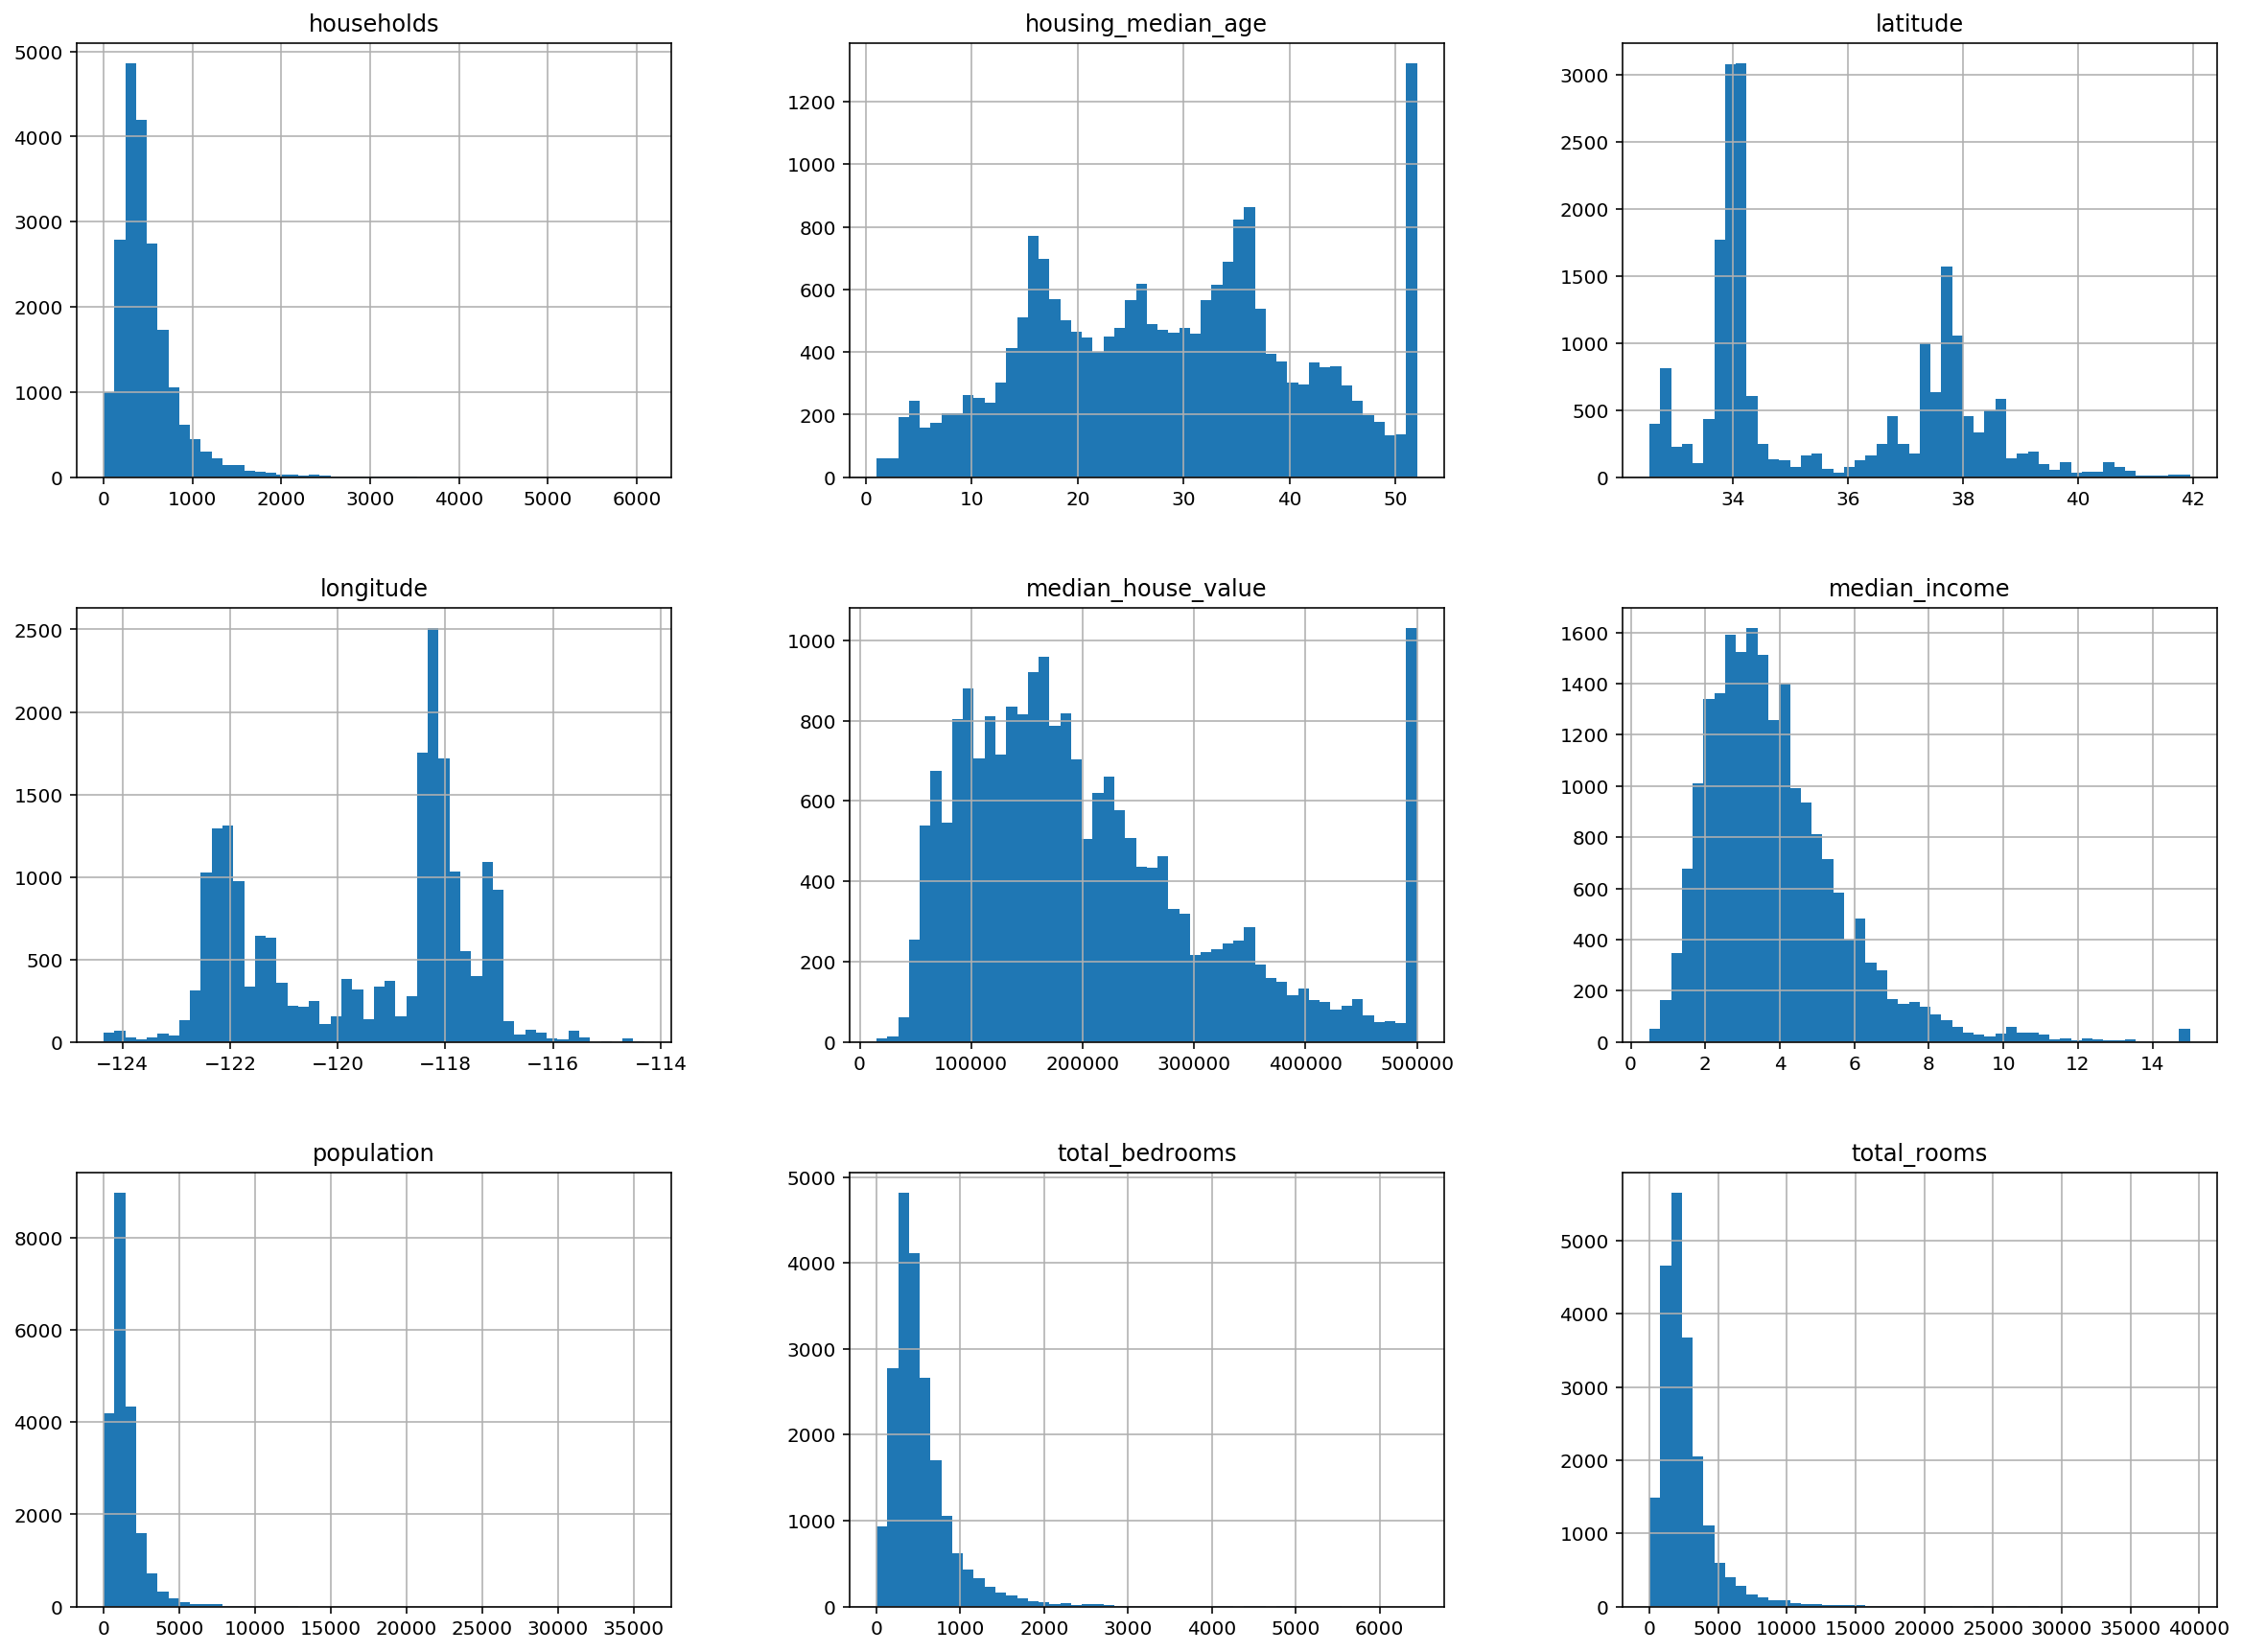

In [7]:
# 各个属性的数据分布
housing_df.hist(bins=50, figsize=(20,15))

### 地理数据可视化
参考：https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

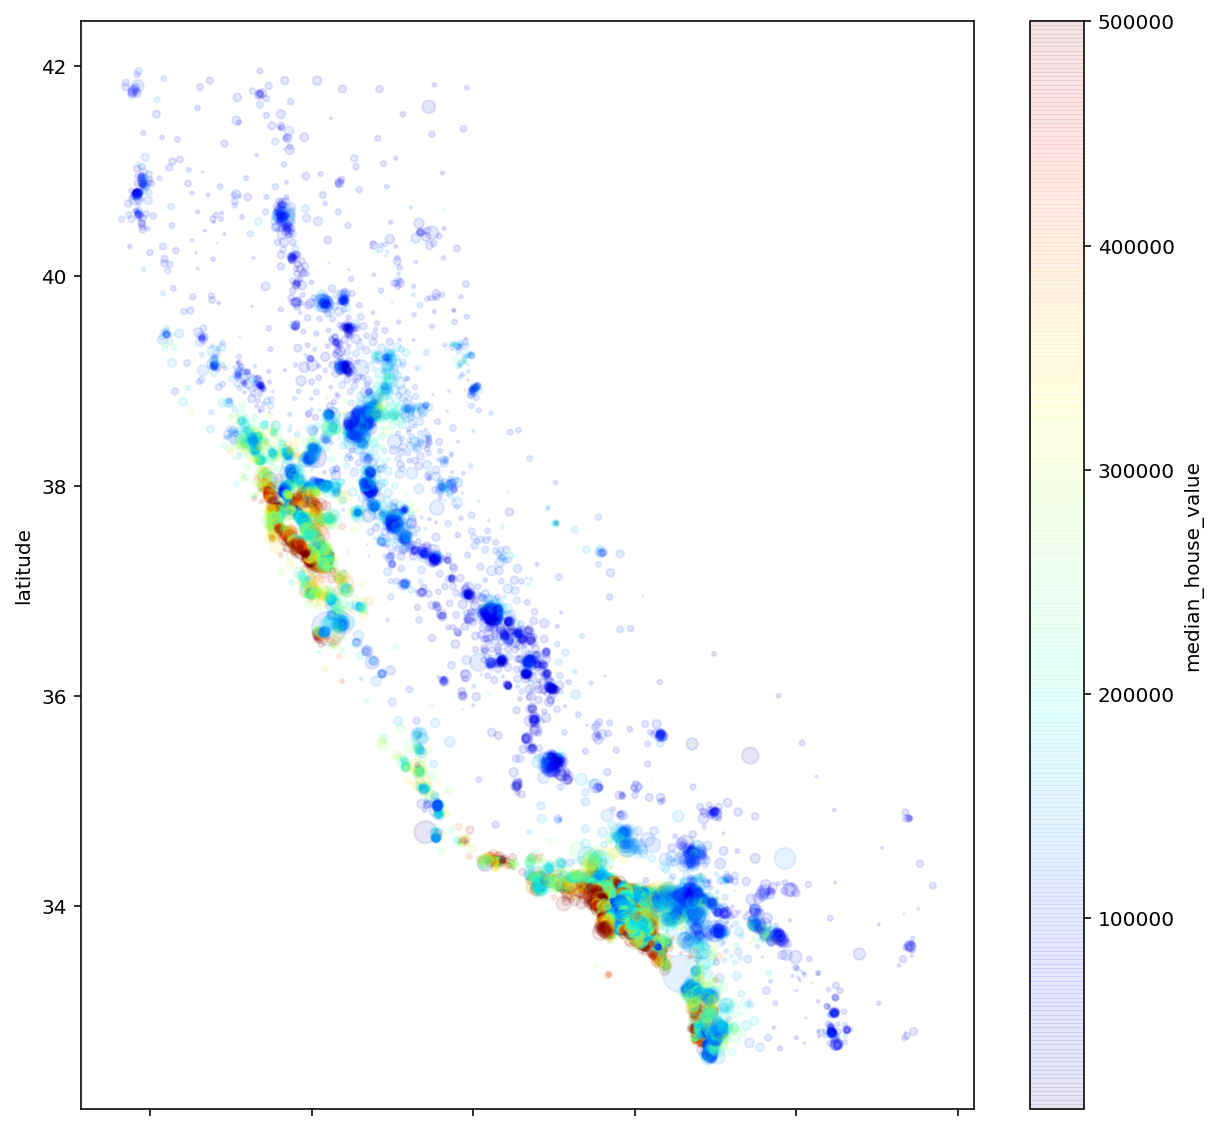

In [8]:
housing_df.plot(kind='scatter', x='longitude', y='latitude', 
                s=housing_df['population']/100, c='median_house_value', cmap=plt.get_cmap('jet'),
                colorbar=True, alpha=0.1, figsize=(10,10))

https://public.tableau.com/views/1990_15748722575690/1990?:display_count=y&publish=yes&:origin=viz_share_link

## 寻找相关性
探索每个属性与房价中位数(median_house_value)的相关性

### 使用相关性矩阵
由于数据集不大，这里使用皮尔逊系数。可使用dataframe自带有corr(method='pearson')函数

#### 直接使用现成字段

In [9]:
corr = housing_df.corr(method='pearson')
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [10]:
# 只查看median_house_value与其他属性的皮尔逊系数。相关系数的数值范围 -1~1.
# 1.趋近于1表示正相关性越强；2.趋近于-1表示负相关性越强；3. 趋近于0表示没有任何关系
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### 组合字段
- population_per_household:  每个家庭的人口数
- rooms_household: 每个家庭的房间数
- bedrooms_per_room: 卧室的占比

In [19]:
housing_df['population_per_household'] = housing_df['population'] / housing_df['households']
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms'] / housing_df['total_rooms']

In [17]:
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_household,rooms_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,6.281853,0.172096
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,2.139896,4.761658,0.231774
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,2.128405,4.931907,0.192899
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,1.788253,4.797527,0.221327
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.026891,4.294118,0.260274
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,2.172269,4.970588,0.199211


In [20]:
corr = housing_df.corr(method='pearson')
corr['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
rooms_household             0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

可以看出bedrooms_per_room在负数最小，于房价呈负相关。population_per_household比较接近于0，与房价的关系不大